In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 第一问

In [2]:
# 初始化
customer_in = pd.Series([0])
customer_out = pd.Series([0])
station1 = 0
station2 = 0
start_customer = 0
finish_customer = 0
clock = 0

# 生成第一个事件
next_arrival = np.random.exponential(1/1.8)
next_station1_1 = 1e10
next_station1_2 = 1e10
next_station2 = 1e10

In [3]:
# 循环直到第4000个客户离开
while finish_customer < 4000:
    # 新的时间为下一个事件
    clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)

    # 判断哪个事件发生了，并做出相应反应
    if next_arrival == clock:
        station1 += 1
        start_customer += 1
        # 记录第i个顾客第进入时间
        customer_in[start_customer] = clock
    elif next_station1_1 == clock:
        station1 -= 1
        station2 += 1
    elif next_station1_2 == clock:
        station1 -= 1
        station2 += 1
    elif next_station2 == clock:
        station2 -= 1
        finish_customer += 1
        # 记录第i个顾客的离开时间
        customer_out[finish_customer] = clock





    #更新事件（无记忆性）
    next_arrival = clock + np.random.exponential(1/1.8)

    if station1 >= 2:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + np.random.exponential(1)
    elif station1 > 0:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + 1e10
    else:
        next_station1_1 = clock + 1e10
        next_station1_2 = clock + 1e10

    if station2 > 0:
        next_station2 = clock + np.random.exponential(1/2)
    else:
        next_station2 = clock + 1e10


## 第二问

(array([314., 701., 640., 538., 403., 165., 119.,  62.,  32.,  26.]),
 array([ 0.1756303 ,  3.17996542,  6.18430053,  9.18863565, 12.19297077,
        15.19730589, 18.20164101, 21.20597613, 24.21031125, 27.21464636,
        30.21898148]),
 <BarContainer object of 10 artists>)

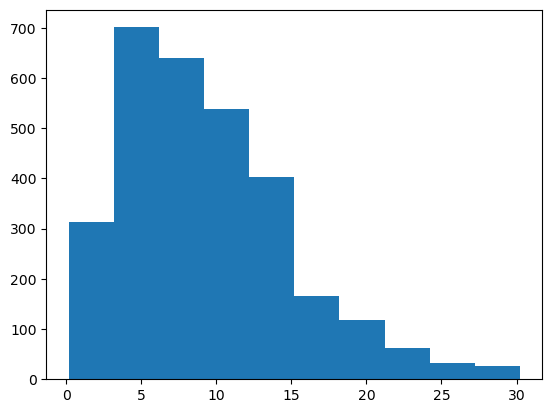

In [4]:
sojourn_time = customer_out - customer_in
warmed_sojourn_time_2 = sojourn_time[1000:4000]
plt.hist(warmed_sojourn_time_2)

In [5]:
warmed_sojourn_time_2.describe()

count    3000.000000
mean        9.362713
std         5.575216
min         0.175630
25%         5.198729
50%         8.189086
75%        12.452900
max        30.218981
dtype: float64

## 第三问

In [33]:
def lambda_exp1_norm0515(Lambda=1.8):
    # 初始化
    customer_in = pd.Series([0])
    customer_out = pd.Series([0])
    station1 = 0
    station2 = 0
    start_customer = 0
    finish_customer = 0
    A_list = pd.Series([0])


    # 生成第一个事件
    next_arrival = np.random.exponential(1/Lambda)
    next_station1_1 = 1e10
    next_station1_2 = 1e10
    next_station2 = 1e10

    # 循环直到第4000个客户离开
    while finish_customer < 4000:
        # 新的时间为下一个事件
        clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)


        # 判断station2的情况
        new_station2_normal = False

        # 判断哪个事件发生了，并做出相应反应
        if next_arrival == clock:
            station1 += 1
            # 记录第i个顾客第进入时间
            start_customer += 1
            customer_in[start_customer] = clock

        elif next_station1_1 == clock:
            station1 -= 1
            station2 += 1
            # 判断station2的情况
            if station2 == 1:
                new_station2_normal = True

        elif next_station1_2 == clock:
            station1 -= 1
            station2 += 1
            # 判断station2的情况
            if station2 == 1:
                new_station2_normal = True

        elif next_station2 == clock:
            station2 -= 1
            if station2 > 0:
                new_station2_normal = True
            # 记录第i个顾客的离开时间
            finish_customer += 1
            customer_out[finish_customer] = clock

        #更新事件（无记忆性）
        next_arrival = clock + np.random.exponential(1/Lambda)

        if station1 >= 2:
            next_station1_1 = clock + np.random.exponential(1)
            next_station1_2 = clock + np.random.exponential(1)
        elif station1 == 1:
            next_station1_1 = clock + np.random.exponential(1)
            next_station1_2 = clock + 1e10
        else:
            next_station1_1 = clock + 1e10
            next_station1_2 = clock + 1e10

        # 更新station2的情况
        if new_station2_normal:
            next_station2_add = np.random.normal(loc=0.5,scale=0.15)
            while next_station2_add <= 0:
                next_station2_add = np.random.normal(loc=0.5,scale=0.15)
            next_station2 = clock + next_station2_add

        if station2 == 0 :
            next_station2 = clock + 2e10

    # 计算输出
    sojourn_time = customer_out - customer_in
    warmed_sojourn_time = sojourn_time[1000:4000]

    return  warmed_sojourn_time

(array([560., 899., 306., 269., 291., 191., 166., 162., 119.,  37.]),
 array([ 0.32321927,  3.42479802,  6.52637677,  9.62795552, 12.72953427,
        15.83111302, 18.93269177, 22.03427052, 25.13584927, 28.23742802,
        31.33900677]),
 <BarContainer object of 10 artists>)

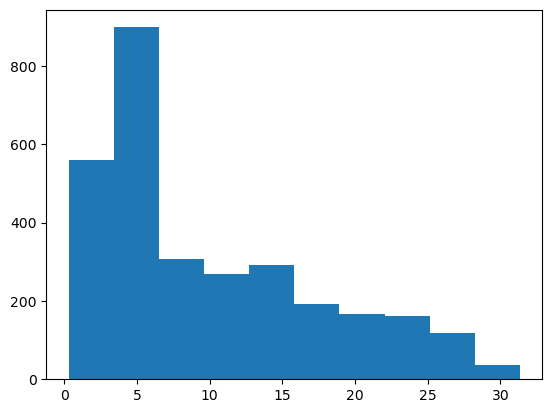

In [34]:
warmed_sojourn_time_3 = lambda_exp1_norm0515(1.8)
plt.hist(warmed_sojourn_time_3)

In [35]:
warmed_sojourn_time_3.describe()


count    3000.000000
mean       10.022808
std         7.581257
min         0.323219
25%         3.952322
50%         6.772829
75%        15.188631
max        31.339007
dtype: float64

## 第四问

In [40]:
result_4 = pd.Series()
for Lambda in np.arange(0.05,2,0.01):
    warmed_sojourn_time_4 = lambda_exp1_norm0515(Lambda)
    result_4[Lambda] = warmed_sojourn_time_4.mean()


/var/folders/qj/s_39ngds10394t00jt5t0c4w0000gn/T/ipykernel_24108/2875298427.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result_4 = pd.Series()


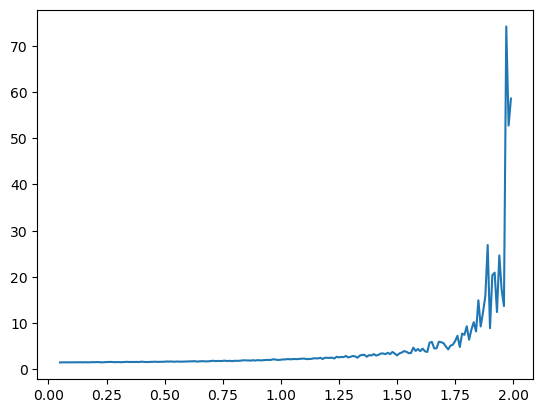

In [41]:
plt.plot(result_4)
